In [1]:
# For commands
import os
os.chdir('E:\\Image-Classification')
import warnings
warnings.filterwarnings('ignore')
# For array manipulation
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
import cv2
import imageio as io
#For model performance
import joblib
#For model training
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow import keras

In [2]:
optimizer = Adam(learning_rate=0.001) 
model = load_model("models/encoder_model.h5")
model.compile(optimizer=optimizer, loss='mse')
knn = joblib.load('models/knn_model.pkl','w+')
kmeans_files = list(pd.read_csv('Dataset/kmeans_files.csv')['Image_name'])

In [3]:
def plot_(x,y1,y2,row,col,ind,title,xlabel,ylabel,label,isimage=False,color='r'):

    """
    This function is used for plotting images and graphs (Visualization of end results of model training)
    Arguments:
    x - (np.ndarray or list) - an image array
    y1 - (list) - for plotting graph on left side.
    y2 - (list) - for plotting graph on right side.
    row - (int) - row number of subplot
    col - (int) - column number of subplot
    ind - (int) - index number of subplot
    title - (string) - title of the plot 
    xlabel - (list) - labels of x axis
    ylabel - (list) - labels of y axis
    label - (string) - for adding legend in the plot
    isimage - (boolean) - True in case of image else False
    color - (char) - color of the plot (prefered green for training and red for testing).
    """
    
    plt.subplot(row,col,ind)
    if isimage:
        plt.imshow(x)
        plt.title(title)
        plt.axis('off')
    else:
        plt.plot(y1,label=label,color='g'); plt.scatter(x,y1,color='g')
        if y2!='':
            plt.plot(y2,color=color,label='validation');
            plt.scatter(x,y2,color=color)
        plt.grid()
        plt.legend()
        plt.title(title); plt.xlabel(xlabel); plt.ylabel(ylabel)

In [4]:
def results_(query,result):
    
    """
    Plotting the N similar images from the dataset with query image.
    Arguments:
    query - (string) - filename of the query image
    result - (list) - filenames of similar images
    """

    def read(img):
        image = cv2.imread('Dataset/animal/'+img)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        return image
    plt.figure(figsize=(10,5))
    if type(query)!=type(30):
        plot_(query,"","",1,1,1,"Query Image","","","",True)
    else:
        plot_(read(kmeans_files[query]),"","",1,1,1,"Query Image "+kmeans_files[query],"","","",True)
    plt.show()
    plt.figure(figsize=(20,5))
    print("Similar Images ...")
    for iter,i in enumerate(result):
        plot_(read(kmeans_files[i]),"","",1,len(result),iter+1,kmeans_files[i],"","","",True)
    plt.show()

In [5]:
def predictions(label,N=6,isurl=False):

    """
    Making predictions for the query images and returns N similar images from the dataset.
    We can either pass filename or the url for the image.
    Arguments:
    label - (string) - file name of the query image.
    N - (int) - Number of images to be returned
    isurl - (string) - if query image is from google is set to True else False(By default = False)
    """

    if isurl:
        img = io.imread(label)
        img = cv2.resize(img,(128,128))
    else:
        img_path = 'Dataset/animal/'+label
        img = image.load_img(img_path, target_size=(128,128))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data,axis=0)
    img_data = preprocess_input(img_data)
    feature = K.function([model.layers[0].input],[model.layers[10].output])
#     print(feature(img_data)[0])
    feature = feature(img_data)[0]
    feature = np.array(feature).flatten().reshape(1,-1)
    res = knn.kneighbors(feature.reshape(1,-1),return_distance=True,n_neighbors=N)
    results_(img,list(res[1][0])[1:])

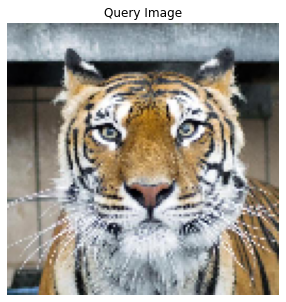

Similar Images ...


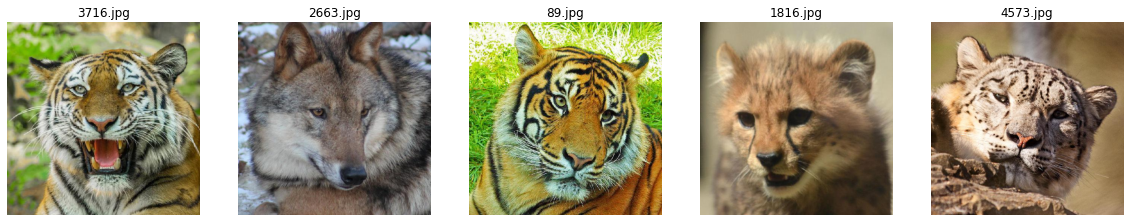

In [6]:
image_name = '20.jpg'
predictions(image_name)